# <font color='blue'> Descarga y preparación de datos </font>

El objetivo de este _notebook_ es, partiendo de la lista de componentes del _Índice de Precios y Cotizaciones_ de la Bolsa Mexicana de valores ([**BMV/IPC**](https://www.bmv.com.mx/es/indices/principales/)), obtener las series de tiempo de sus precios desde [Yahoo Finance](https://finance.yahoo.com/).

El lenguaje de programación utilizado es [`Python 3`](https://www.python.org/about/).

## <font color='crimson'> Preámbulos </font>

Un paquete muy útil para nuestro proposito es [`yahoofinancials`](https://pypi.org/project/yahoofinancials/).

Importar bibliotecas o módulos:

In [9]:
from yahoofinancials import YahooFinancials as yf
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Como primer ejemplo, vamos a descargar el índice a partir de su [símbolo bursátil](https://www.investopedia.com/terms/s/stocksymbol.asp) (_ticker symbol_, o simplemente _ticker_). 

> **Nota**: Todas las compañías que componen el **BMV/IPC** pueden obtenerse de [esta](https://espanol.spindices.com/indices/equity/sp-bmv-ipc) página.

In [11]:
bmvIndexTicker = '^MXX' #Este es el ticker del índice del IPC
bmvIndex = yf(bmvIndexTicker)

bmvSummaryData=bmvIndex.get_summary_data(reformat=True)

In [14]:
print(
    json.dumps(
        bmvSummaryData,
        ensure_ascii=False,
        indent=4
    )
)

{
    "^MXX": {
        "previousClose": 48344.97,
        "regularMarketOpen": 48202.45,
        "twoHundredDayAverage": 52088.98,
        "trailingAnnualDividendYield": null,
        "payoutRatio": null,
        "volume24Hr": null,
        "regularMarketDayHigh": 48202.45,
        "navPrice": null,
        "averageDailyVolume10Day": 167816180,
        "totalAssets": null,
        "regularMarketPreviousClose": 48344.97,
        "fiftyDayAverage": 51578.934,
        "trailingAnnualDividendRate": null,
        "open": 48202.45,
        "toCurrency": null,
        "averageVolume10days": 167816180,
        "expireDate": "-",
        "yield": null,
        "algorithm": null,
        "dividendRate": null,
        "exDividendDate": "-",
        "beta": null,
        "circulatingSupply": null,
        "startDate": "-",
        "regularMarketDayLow": 47323.36,
        "priceHint": 2,
        "currency": "MXN",
        "regularMarketVolume": 155305236,
        "lastMarket": null,
        "maxSu

Conseguir datos históricos:

In [15]:
dateInitial='2008-09-15' #formato YYYY-MM-DD
dateFinal='2022-06-16'

In [16]:
bmvHistoricalPrices = bmvIndex.get_historical_price_data(
    dateInitial,
    dateFinal,
    'daily'
)

Examinar la estructura de los datos descargados:

In [17]:
type(bmvHistoricalPrices)

dict

In [18]:
bmvHistoricalPrices.keys()

dict_keys(['^MXX'])

In [19]:
bmvHistoricalPrices[bmvIndexTicker].keys()

dict_keys(['eventsData', 'firstTradeDate', 'currency', 'instrumentType', 'timeZone', 'prices'])

In [20]:
type(bmvHistoricalPrices[bmvIndexTicker]['prices'])

list

Ver algunos precios:

In [22]:
print(
    json.dumps(
        bmvHistoricalPrices[bmvIndexTicker]['prices'][0:3],
        indent=4,
        ensure_ascii=False
    )
)

[
    {
        "date": 1221485400,
        "high": 25427.69921875,
        "low": 24610.5390625,
        "open": 25427.69921875,
        "close": 24618.150390625,
        "volume": 125304000,
        "adjclose": 24618.150390625,
        "formatted_date": "2008-09-15"
    },
    {
        "date": 1221658200,
        "high": 24722.69921875,
        "low": 23383.6796875,
        "open": 24618.150390625,
        "close": 23456.83984375,
        "volume": 280231000,
        "adjclose": 23456.83984375,
        "formatted_date": "2008-09-17"
    },
    {
        "date": 1221744600,
        "high": 24596.990234375,
        "low": 23181.740234375,
        "open": 23457.8203125,
        "close": 24577.900390625,
        "volume": 282824600,
        "adjclose": 24577.900390625,
        "formatted_date": "2008-09-18"
    }
]


Guardar los datos:

In [85]:
dataName=f'{bmvIndexTicker}_from{dateInitial}_to{dateFinal}'
location='./data'
today=!date "+%Y%m%d"
today=today[0]

with open(f'{location}/{dataName}_downloaded{today}.json','w+') as arshivo:
    json.dump(
        bmvHistoricalPrices,
        arshivo,
        ensure_ascii=False,
        indent=4
    )

Verificar que se guardó bien:

In [118]:
! head -v -n 23 '{location}/{dataName}_downloaded{today}.json'

==> ./data/^MXX_from2008-09-15_to2022-06-16_downloaded20220616.json <==
{
    "^MXX": {
        "eventsData": {},
        "firstTradeDate": {
            "formatted_date": "1991-11-08",
            "date": 689610600
        },
        "currency": "MXN",
        "instrumentType": "INDEX",
        "timeZone": {
            "gmtOffset": -18000
        },
        "prices": [
            {
                "date": 1221485400,
                "high": 25427.69921875,
                "low": 24610.5390625,
                "open": 25427.69921875,
                "close": 24618.150390625,
                "volume": 125304000,
                "adjclose": 24618.150390625,
                "formatted_date": "2008-09-15"
            },


¿Qué clase de datos hay guardados?

In [38]:
dataTypes=bmvHistoricalPrices[bmvIndexTicker]['prices'][0]
dataTypes

{'date': 1221485400,
 'high': 25427.69921875,
 'low': 24610.5390625,
 'open': 25427.69921875,
 'close': 24618.150390625,
 'volume': 125304000,
 'adjclose': 24618.150390625,
 'formatted_date': '2008-09-15'}

Crear un [`DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).

In [46]:
priceTypes=['high','low','open','close','adjclose','volume']

bmvIndexDataFrame=pd.DataFrame(
    [
        {k:dataRecord[k] for k in priceTypes} for dataRecord in bmvHistoricalPrices[bmvIndexTicker]['prices']
    ],
    index=pd.to_datetime(
        [dataRecord['formatted_date'] for dataRecord in bmvHistoricalPrices[bmvIndexTicker]['prices']]
    ),
    
)

In [47]:
bmvIndexDataFrame.tail()

,high,low,open,close,adjclose,volume
2022-06-09,50012.621094,49229.808594,49854.730469,49290.218750,49290.218750,154551700.0
2022-06-10,49147.199219,48398.781250,49147.199219,48471.519531,48471.519531,137514100.0
2022-06-13,48717.671875,47775.839844,48408.199219,48445.300781,48445.300781,251393900.0
2022-06-14,48677.109375,48083.160156,48557.468750,48164.468750,48164.468750,191851500.0
2022-06-15,48610.300781,48137.648438,48388.148438,48344.968750,48344.968750,175223100.0


Este arreglo tiene las siguientes dimensiones:

In [62]:
bmvIndexDataFrame.shape

(3450, 6)

Graficar:

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

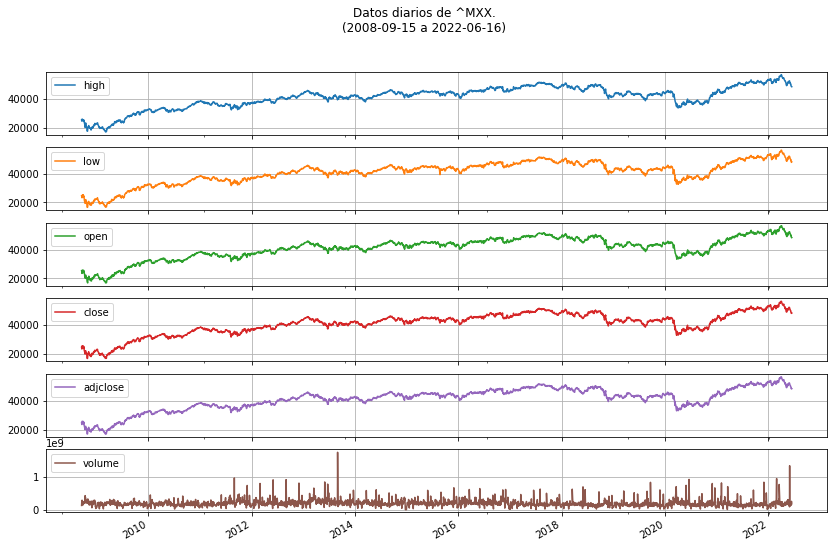

In [58]:
%matplotlib inline

bmvIndexDataFrame.plot(
    figsize=(14,9),
    subplots=True,
    grid=True,
    title=f'Datos diarios de {bmvIndexTicker}.\n({dateInitial} a {dateFinal})'
)

Es importante recordar que varias de las características de los datos están en `bmvSummaryData`.

In [54]:
print(f"Los precios están expresados en {bmvSummaryData[bmvIndexTicker]['currency']}.")

Los precios están expresados en MXN.


Podemos obtener los rendimientos de las series de tiempo:
* Porcentuales: $\displaystyle X_i(t+1)=\frac{P_{i+1}(t)-P_{i}(t)}{P_{i}(t)}$
* **Logarítmicos**: $\displaystyle X_i(t+1)=\log\left(\frac{P_{i+1}(t)}{P_{i}(t)}\right)=\log\left(P_{i+1}(t)\right) - \log\left(P_{i}(t)\right)$
> **Nota**: Como 
> 
> * $\displaystyle \frac{P_{i+1}(t)}{P_{i}(t)}=\frac{P_{i+1}(t)-P_{i}(t)}{P_{i}(t)}+1$
> * $\displaystyle \log(1+x)=\sum_{n=0}^{\infty} (-1)^n \frac{x^{n+1}}{n+1}\approx x-\frac{x^2}{2}+\mathcal{O}(3)$ 
>
> entonces los rendimientos logarítmicos son casi los porcentuales cuando éstos son pequeños en comparación con 1.

In [61]:
bmvIndexReturns=np.log(bmvIndexDataFrame.loc[:, bmvIndexDataFrame.columns != 'volume']).diff(axis=0)
bmvIndexReturns

,high,low,open,close,adjclose
2008-09-15,NaN,NaN,NaN,NaN,NaN
2008-09-17,-0.028117,-0.051136,-0.032355,-0.048322,-0.048322
2008-09-18,-0.005098,-0.008673,-0.048280,0.046686,0.046686
2008-09-19,0.059870,0.061007,0.049168,0.044683,0.044683
2008-09-22,-0.014791,0.019754,0.042218,-0.022393,-0.022393
...,...,...,...,...,...
2022-06-09,-0.003587,-0.008077,-0.004687,-0.010677,-0.010677
2022-06-10,-0.017456,-0.017025,-0.014294,-0.016749,-0.016749
2022-06-13,-0.008778,-0.012955,-0.015151,-0.000541,-0.000541
2022-06-14,-0.000833,0.006412,0.003079,-0.005814,-0.005814


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

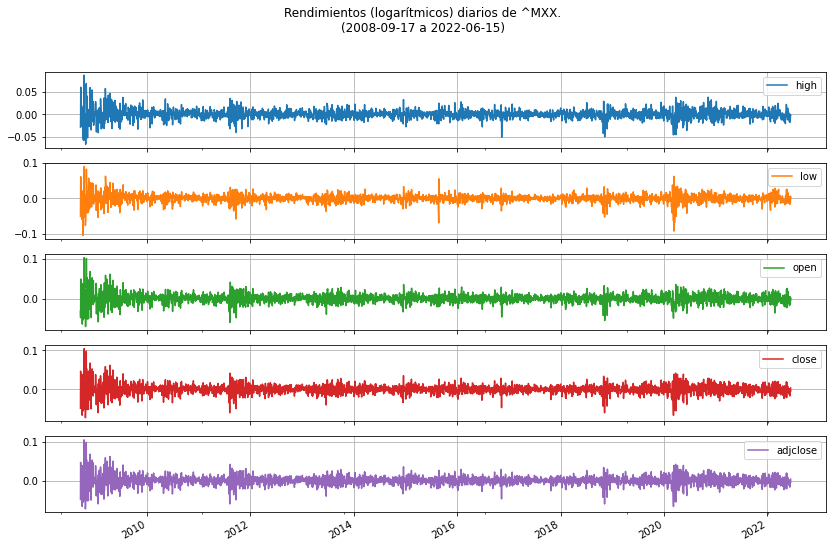

In [73]:
%matplotlib inline

bmvIndexReturns.plot(
    figsize=(14,9),
    subplots=True,
    grid=True,
    title=(f'Rendimientos (logarítmicos) diarios de {bmvIndexTicker}.\n'
    '({0:%Y-%m-%d} a {1:%Y-%m-%d})'.format(*list(bmvIndexReturns.index[[1,-1]])))
)

## <font color='crimson'> Preparación de los datos en forma columnar </font>

Muy a menudo, los datos descargados no vienen completos (aunque en la gráfica anterior no sea evidente):

In [87]:
bmvIndexReturns.isnull().sum(axis=0)

high        9
low         9
open        9
close       9
adjclose    9
dtype: int64

Es posible encontrar los registros (renglones) donde esto ocurre.

In [95]:
bmvIndexReturnsHoles=bmvIndexReturns[bmvIndexReturns.isna().any(axis=1)]
bmvIndexReturnsHoles

,high,low,open,close,adjclose
2008-09-15,NaN,NaN,NaN,NaN,NaN
2009-02-02,NaN,NaN,NaN,NaN,NaN
2009-02-03,NaN,NaN,NaN,NaN,NaN
2011-12-26,NaN,NaN,NaN,NaN,NaN
2011-12-27,NaN,NaN,NaN,NaN,NaN
2012-01-02,NaN,NaN,NaN,NaN,NaN
2012-01-03,NaN,NaN,NaN,NaN,NaN
2014-12-26,NaN,NaN,NaN,NaN,NaN
2014-12-29,NaN,NaN,NaN,NaN,NaN


El problema empieza a ser complejo cuando hay datos ausentes consecutivos (reconocibles mediante 1's consecutivos, en el siguiente arreglo).

In [101]:
bmvIndexReturnsHoles.index.to_series().diff()

2008-09-15         NaT
2009-02-02    140 days
2009-02-03      1 days
2011-12-26   1056 days
2011-12-27      1 days
2012-01-02      6 days
2012-01-03      1 days
2014-12-26   1088 days
2014-12-29      3 days
dtype: timedelta64[ns]

Una solución es hacer [una interpolación](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html), estableciendo un método y una tolerancia. De acuerdo con la documentación de `**Pandas**`, los métodos disponibles (parámetro `method` en `pandas.DataFrame.interpolate`) son:
> * **‘linear’**: Ignore the index and treat the values as equally spaced. This is the only method supported on MultiIndexes.
> * **‘time’**: Works on daily and higher resolution data to interpolate given length of interval.
> * **‘index’, ‘values’**: use the actual numerical values of the index.
> * **‘pad’:** Fill in NaNs using existing values.
> * **‘nearest’**, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘spline’, ‘barycentric’, ‘polynomial’: Passed to scipy.interpolate.interp1d. These methods use the numerical values of the index. Both ‘polynomial’ and ‘spline’ require that you also specify an order (int), e.g. df.interpolate(method='polynomial', order=5).
> * **‘krogh’, ‘piecewise_polynomial’, ‘spline’, ‘pchip’, ‘akima’, ‘cubicspline’**: Wrappers around the SciPy interpolation methods of similar names. See Notes.
> * **‘from_derivatives’**: Refers to scipy.interpolate.BPoly.from_derivatives which replaces ‘piecewise_polynomial’ interpolation method in scipy 0.18.

> **Nota**: Consultado el 16/06/2022.

In [103]:
tolerancia=2

bmvIndexReturns.interpolate(
    method='cubic',
    limit_direction='both',
    limit=tolerancia,
    inplace=True #Para mutar el arreglo original
)

In [104]:
bmvIndexReturns.isnull().sum(axis=0)

high        1
low         1
open        1
close       1
adjclose    1
dtype: int64

Los únicos _huecos_ restantes son los obtenidos por la diferenciación discreta:

In [105]:
bmvIndexReturns[bmvIndexReturns.isna().any(axis=1)]

,high,low,open,close,adjclose
2008-09-15,NaN,NaN,NaN,NaN,NaN


Quitamos el renglón con datos vacíos:

In [108]:
bmvIndexReturns.dropna(
    axis='index', #También puede ser 'columns', para desechar columnas con uno o todos los registros ausentes.
    how='any', #También puede ser 'all', para tirar registros con todos los datos ausentes.
    inplace=True
)

El arreglo resultante ya no tiene _huecos_:

In [109]:
bmvIndexReturns[bmvIndexReturns.isna().any(axis=1)]

,high,low,open,close,adjclose


Ahora guardamos los datos en formato `.csv` (que es bastante estándar):

In [111]:
print(f'{location}/returns{dataName}_downloaded{today}.csv') #Este es un nombre sugerido

./data/returns^MXX_from2008-09-15_to2022-06-16_downloaded20220616.csv


In [112]:
bmvIndexReturns.to_csv(
    f'{location}/returns{dataName}_downloaded{today}.csv'
)

El archivo luce así:

In [119]:
! head -v -n 5 '{location}/returns{dataName}_downloaded{today}.csv'

==> ./data/returns^MXX_from2008-09-15_to2022-06-16_downloaded20220616.csv <==
,high,low,open,close,adjclose
2008-09-17,-0.028117281936747673,-0.05113643858803485,-0.03235510862275781,-0.04832186150505535,-0.04832186150505535
2008-09-18,-0.005097731068488542,-0.008673419864965837,-0.04828006353628034,0.04668555093371296,0.04668555093371296
2008-09-19,0.05987006873535172,0.06100702141369574,0.04916800322614634,0.04468336049307453,0.04468336049307453
2008-09-22,-0.014791441082509849,0.019754460157223264,0.042217851898003644,-0.022392681901589384,-0.022392681901589384


> **Nota**: En el archivo `.data/worldIndices_20220616.json` hay un diccionario con otros índices y sus correspondientes símbolos bursátiles.